In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame(columns=['threads','schedule(static)','schedule(static, 1)','schedule(dynamic)'])

In [3]:
df.loc[0] = [1,3.86916,3.88649,3.8834]

In [4]:
df.loc[1] = [2,1.98316,1.98051,1.95516]

In [5]:
df.loc[2] = [4,1.66062,1.0448,1.02617]

In [6]:
df.loc[3] = [8,1.232,0.53462,0.54114]

In [7]:
df.loc[4] = [16,0.984414,0.303005,0.38857]

In [8]:
df

,threads,schedule(static),"schedule(static, 1)",schedule(dynamic)
0,1.0,3.869160,3.886490,3.88340
1,2.0,1.983160,1.980510,1.95516
2,4.0,1.660620,1.044800,1.02617
3,8.0,1.232000,0.534620,0.54114
4,16.0,0.984414,0.303005,0.38857


In [10]:
dynamic = pd.DataFrame(columns=['Time of execution','Threads','Speedup','Efficiency'])

for i in range(0,4+1):
    num_thread = df['threads'][i]
    time = df['schedule(dynamic)'][i]
    t1 = df['schedule(dynamic)'][0]
    speedup = t1/time
    efficiency = speedup/num_thread
    threads = num_thread
    dynamic.loc[i-1] = [time,threads,speedup,efficiency]
dynamic= dynamic.reset_index().drop('index',axis=1)
dynamic

,Time of execution,Threads,Speedup,Efficiency
0,3.88340,1.0,1.000000,1.000000
1,1.95516,2.0,1.986231,0.993116
2,1.02617,4.0,3.784363,0.946091
3,0.54114,8.0,7.176331,0.897041
4,0.38857,16.0,9.994081,0.624630


In [11]:
static1 = pd.DataFrame(columns=['Time of execution','Threads','Speedup','Efficiency'])

for i in range(0,4+1):
    num_thread = df['threads'][i]
    time = df['schedule(static, 1)'][i]
    t1 = df['schedule(static, 1)'][0]
    speedup = t1/time
    efficiency = speedup/num_thread
    threads = num_thread
    static1.loc[i-1] = [time,threads,speedup,efficiency]
static1= static1.reset_index().drop('index',axis=1)
static1

,Time of execution,Threads,Speedup,Efficiency
0,3.886490,1.0,1.000000,1.000000
1,1.980510,2.0,1.962368,0.981184
2,1.044800,4.0,3.719841,0.929960
3,0.534620,8.0,7.269631,0.908704
4,0.303005,16.0,12.826488,0.801656


In [12]:
static = pd.DataFrame(columns=['Time of execution','Threads','Speedup','Efficiency'])

for i in range(0,4+1):
    num_thread = df['threads'][i]
    time = df['schedule(static)'][i]
    t1 = df['schedule(static)'][0]
    speedup = t1/time
    efficiency = speedup/num_thread
    threads = num_thread
    static.loc[i-1] = [time,threads,speedup,efficiency]
static = static.reset_index().drop('index',axis=1)
static

,Time of execution,Threads,Speedup,Efficiency
0,3.869160,1.0,1.000000,1.000000
1,1.983160,2.0,1.951007,0.975504
2,1.660620,4.0,2.329949,0.582487
3,1.232000,8.0,3.140552,0.392569
4,0.984414,16.0,3.930420,0.245651


In [55]:
result = pd.concat([static,static1,dynamic] ,keys=["static", "static1", "dynamic"])
result = result.reset_index()
result = result.drop('level_1',axis=1)
result = result.rename(columns={'level_0':'name'})
result

,name,Time of execution,Threads,Speedup,Efficiency
0,static,3.869160,1.0,1.000000,1.000000
1,static,1.983160,2.0,1.951007,0.975504
2,static,1.660620,4.0,2.329949,0.582487
3,static,1.232000,8.0,3.140552,0.392569
4,static,0.984414,16.0,3.930420,0.245651
5,static1,3.886490,1.0,1.000000,1.000000
6,static1,1.980510,2.0,1.962368,0.981184
7,static1,1.044800,4.0,3.719841,0.929960
8,static1,0.534620,8.0,7.269631,0.908704
9,static1,0.303005,16.0,12.826488,0.801656


In [74]:

df = pd.pivot_table(result, values='Efficiency', index=['Threads'], columns=['name'])
df

name,dynamic,static,static1
Threads,,,
1.0,1.000000,1.000000,1.000000
2.0,0.993116,0.975504,0.981184
4.0,0.946091,0.582487,0.929960
8.0,0.897041,0.392569,0.908704
16.0,0.624630,0.245651,0.801656


In [73]:
df = pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/5_OneCatSevNumOrdered.csv")

# filter data
df = df.loc[(df.name=="Ashley") | (df.name=="Amanda")]
df = df.loc[(df.sex=="F") & (df.year>1970)]
df = pd.pivot_table(df, values='n', index=['year'], columns=['name'])
df.head()

name,Amanda,Ashley
year,,
1971,4133,1164
1972,4181,1176
1973,5627,1253
1974,7476,1626
1975,12653,1988


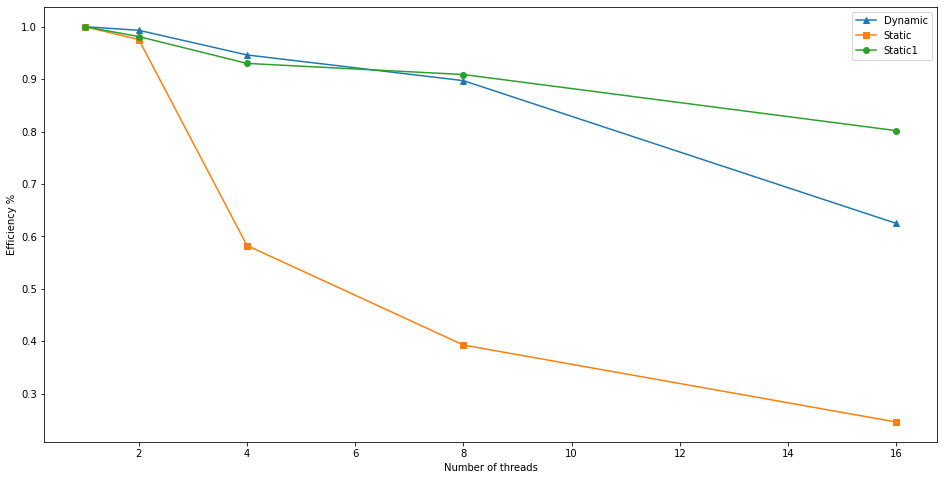

In [88]:

# set the figure size
plt.figure(figsize=(16, 8))

# plot the connected scatterplot
plt.plot(df.dynamic,'-', marker='^',label='Dynamic',)
plt.plot(df.static,'-', marker='s',label='Static')
plt.plot(df.static1,'-', marker='o',label='Static1')

# x axis label
plt.xlabel('Number of threads')

# y axis label
plt.ylabel('Efficiency %')

plt.legend()
# show the graph
plt.show()